In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
reddit = pd.read_csv('wsb_pushshift_data.csv')
reddit.tail()

,Unnamed: 0,title,score,body,timestamp,author
199995,199995,Why the Archegos story is just the beginning; ...,1,NaN,2021-03-29 09:43:06,pragmaticideals206
199996,199996,"Loooook at orderbook! 69,420! This means what ...",1,NaN,2021-03-29 09:40:01,BerniesBamBam224
199997,199997,"Bill Hwang's firm just went tits up, prime bro...",1,NaN,2021-03-29 09:39:43,Onboarding92
199998,199998,Free gift,1,[removed],2021-03-29 09:37:39,MountainPatience2622
199999,199999,Free gift,1,[removed],2021-03-29 09:37:35,MountainPatience2622


## Aggregate the timestamp

In [3]:
reddit['date'] = pd.to_datetime(reddit.timestamp).dt.date
reddit['hour'] = pd.to_datetime(reddit.timestamp).dt.hour
reddit['dayOfWeek'] = pd.to_datetime(reddit['timestamp']).dt.day_name()

In [4]:
reddit.tail()

,Unnamed: 0,title,score,body,timestamp,author,date,hour,dayOfWeek
199995,199995,Why the Archegos story is just the beginning; ...,1,NaN,2021-03-29 09:43:06,pragmaticideals206,2021-03-29,9,Monday
199996,199996,"Loooook at orderbook! 69,420! This means what ...",1,NaN,2021-03-29 09:40:01,BerniesBamBam224,2021-03-29,9,Monday
199997,199997,"Bill Hwang's firm just went tits up, prime bro...",1,NaN,2021-03-29 09:39:43,Onboarding92,2021-03-29,9,Monday
199998,199998,Free gift,1,[removed],2021-03-29 09:37:39,MountainPatience2622,2021-03-29,9,Monday
199999,199999,Free gift,1,[removed],2021-03-29 09:37:35,MountainPatience2622,2021-03-29,9,Monday


## Get total post per day

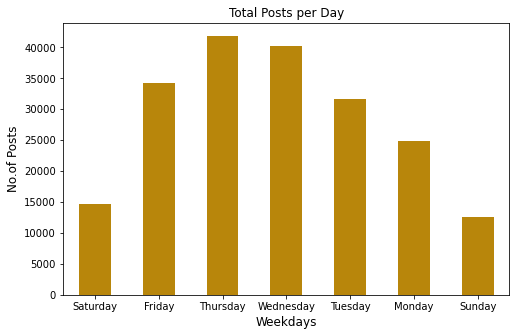

In [5]:
reddit_day = reddit['dayOfWeek']

plt.figure(figsize=(8,5))
reddit_day = reddit_day.groupby(reddit_day,sort=False).count().plot.bar(color='darkgoldenrod')
plt.xlabel("Weekdays", fontsize=12)
plt.ylabel("No.of Posts", fontsize=12)
plt.xticks(rotation='horizontal')
plt.title('Total Posts per Day', fontsize=12)
plt.show()

## Cleaning data

In [6]:
title_reddit = reddit[['title']].dropna()
body_reddit = reddit[['body']].dropna()

In [7]:
title_reddit

,title
0,TABOO OFFICIAL on Twitter
1,Movie Calls Gone Wrong: $23k-&gt;🪦
2,Just bought 500 shares GME 🚀🚀🚀🚀🚀
3,VRCI huge potential
4,Blackberry Technical Analysis
...,...
199995,Why the Archegos story is just the beginning; ...
199996,"Loooook at orderbook! 69,420! This means what ..."
199997,"Bill Hwang's firm just went tits up, prime bro..."
199998,Free gift


In [8]:
body_reddit

,body
2,[removed]
3,[removed]
4,Patience could be a key here for Blackberry. ...
5,"Hello beautiful people,\n\n&amp;#x200B;\n\nI c..."
6,Don't even ask the question. The answer is yes...
...,...
199987,[removed]
199990,[https://www.channelnewsasia.com/news/business...
199994,[removed]
199998,[removed]


In [9]:
def cleantext(text):
    # make lower case
    text = str(text).lower()
    # remove square in brackets
    text = re.sub('\[.*?\]', ' ', text)
    # remove URLs
    text = re.sub(r"http\S+", ' ', text)
    # remove punctuation
    text = re.sub('<.*?>+', ' ', text)
    # remove handlers
    text = re.sub('@[^\s]+', ' ', text)
    # remove all special characters
    text = ' '.join(re.findall(r'\w+', text))
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s', ' ', text)
    # replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

In [10]:
title_reddit['title'] = title_reddit['title'].apply(cleantext)
body_reddit['body'] = body_reddit['body'].apply(cleantext)

## Stemming

In [11]:
import nltk

In [12]:
stemmer = nltk.SnowballStemmer('english')

def stemming(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [13]:
title_reddit['title'] = title_reddit['title'].apply(stemming)
body_reddit['body'] = body_reddit['body'].apply(stemming)

## Get sentiment values for title and body posts 

In [14]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\big_j\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
title_reddit['title_values'] = title_reddit['title'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_reddit['body_values'] = body_reddit['body'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))

In [16]:
def sent_value(text):
    if text['compound']>0:
        return 'Positive'
    elif text['compound']<0:
        return 'Negative'
    else:
        return 'Neutral'

title_reddit['title_sentiments'] = title_reddit['title_values'].apply(lambda x: sent_value(x))
body_reddit['body_sentiments'] = body_reddit['body_values'].apply(lambda x: sent_value(x))

In [17]:
title_reddit.head()

,title,title_values,title_sentiments
0,taboo offici on twitter,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,movi call gone wrong 23k gt,"{'neg': 0.337, 'neu': 0.435, 'pos': 0.228, 'co...",Negative
2,just bought 500 share gme,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",Positive
3,vrci huge potenti,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",Positive
4,blackberri technic analysi,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


In [18]:
body_reddit.head()

,body,body_values,body_sentiments
2,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",Neutral
3,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",Neutral
4,patienc could be key here for blackberri there...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
5,hello beauti peopl amp x200b came across an ad...,"{'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'comp...",Positive
6,don even ask the question the answer is yes it...,"{'neg': 0.052, 'neu': 0.907, 'pos': 0.041, 'co...",Negative


## Plot setiments for title and body posts

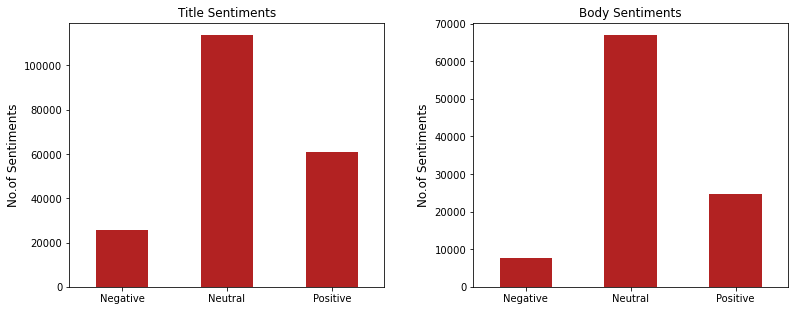

In [19]:
fig, axr = plt.subplots(1,2, figsize=(12, 6))

title_reddit['title_sentiments'].value_counts().sort_index().plot.bar(ax=axr[0], color='firebrick')
ax=axr[0].set_title("Title Sentiments", fontsize=12)

body_reddit['body_sentiments'].value_counts().sort_index().plot.bar(ax=axr[1], color='firebrick')
ax=axr[1].set_title("Body Sentiments", fontsize=12)

fig.tight_layout(pad=5.0)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation='horizontal')
    plt.ylabel("No.of Sentiments", fontsize=12)

## Token Visualization

In [20]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [21]:
# FOR TITLE POSTS
title_text = " ".join(review for review in title_reddit['title'])
print ("There are {} words in the combination of all posts.".format(len(title_text)))

There are 8978355 words in the combination of all posts.


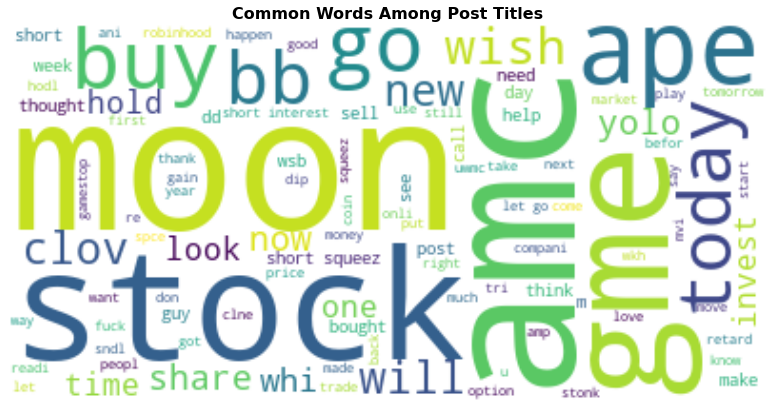

In [22]:
stopwords = set(STOPWORDS)

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=100,
               stopwords=stopwords, contour_width=3)

# Generate a wordcloud
wc.generate(title_text)

# show
plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words Among Post Titles',fontsize=16,fontweight='bold')
plt.axis("off")
plt.show()

In [23]:
# FOR BODY POSTS
body_text = " ".join(review for review in body_reddit['body'])
print ("There are {} words in the combination of all post bodies.".format(len(body_text)))

There are 26193400 words in the combination of all post bodies.


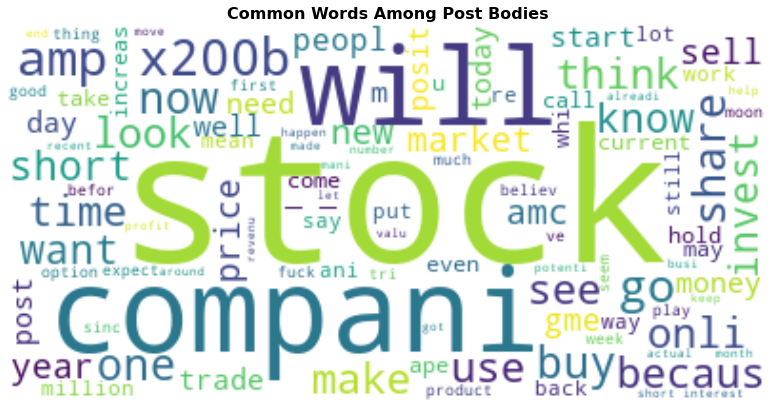

In [24]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=100,
               stopwords=stopwords, contour_width=3)

# Generate a wordcloud
wc.generate(body_text)

# show
plt.figure(figsize=[15,7])
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words Among Post Bodies',fontsize=16,fontweight='bold')
plt.axis("off")
plt.show()

### Common words for each sentiments in post titles

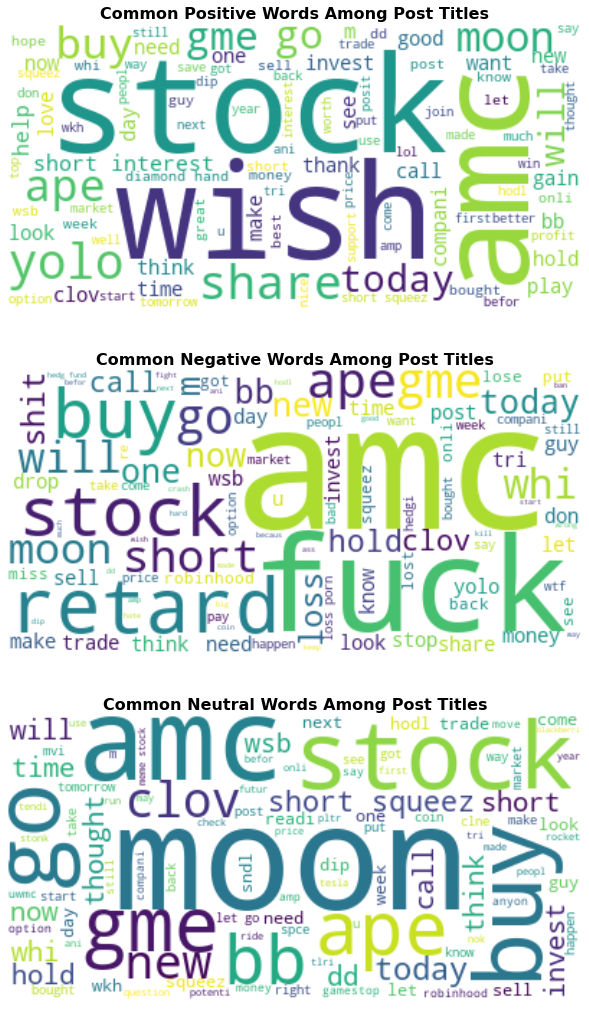

In [25]:
sentiments = ['Positive', 'Negative', 'Neutral']
fig, (axr1, axr2, axr3) = plt.subplots(3, 1, figsize=[20,18])
axes = [axr1, axr2, axr3]

for i in range(3):
    stopwords = set(STOPWORDS)
    titleSent = title_reddit[title_reddit['title_sentiments']==sentiments[i]]['title']
    titleText = ' '.join(titleSent)
    
    wc = WordCloud(background_color="white", max_words=100,
               stopwords=stopwords, contour_width=3).generate(titleText)
    
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Common {sentiments[i]} Words Among Post Titles',fontsize=16,fontweight='bold')
    axes[i].axis("off")
        
plt.show()
    

### Common words for each sentiments in post bodies

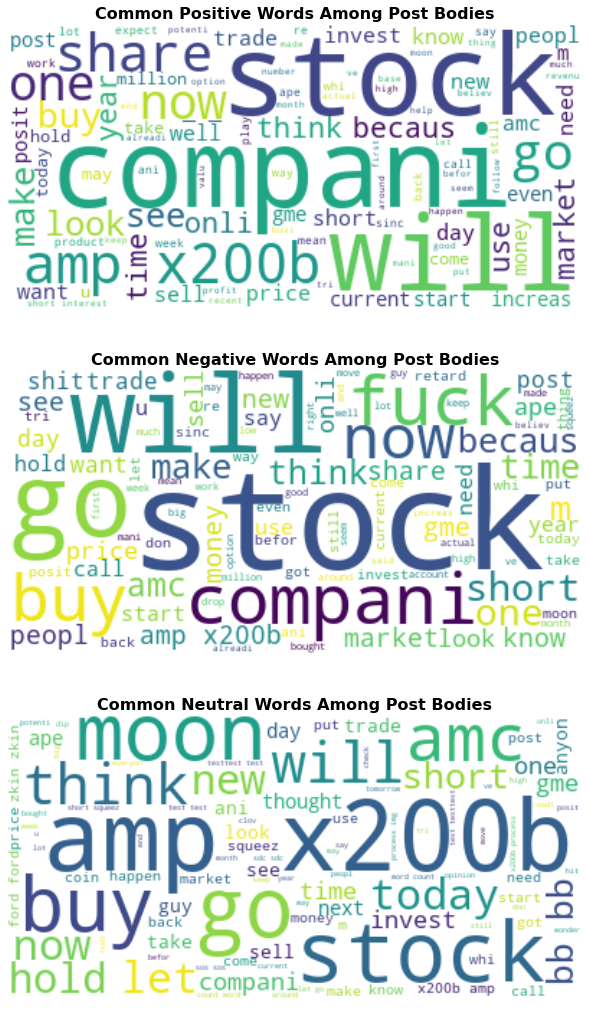

In [26]:
sentiments = ['Positive', 'Negative', 'Neutral']
fig, (axr1, axr2, axr3) = plt.subplots(3, 1, figsize=[20,18])
axes = [axr1, axr2, axr3]

for i in range(3):
    stopwords = set(STOPWORDS)
    bodySent = body_reddit[body_reddit['body_sentiments']==sentiments[i]]['body']
    bodyText = ' '.join(bodySent)
    
    wc = WordCloud(background_color="white", max_words=100,
               stopwords=stopwords, contour_width=3).generate(bodyText)
    
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f'Common {sentiments[i]} Words Among Post Bodies',fontsize=16,fontweight='bold')
    axes[i].axis("off")
        
plt.show()